1. SHANON GIULY ISTANTO - 2702250116
2. TEUKU FAYAZ AHSAN - 2702366634
3. CUT NUR AZIZATI NASWANDI - 2702365184

# **Get ASL Dataset**

In [ ]:
!curl -L -o asl-dataset.zip https://www.kaggle.com/api/v1/datasets/download/grassknoted/asl-alphabet

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 1049M  100 1049M    0     0   132M      0  0:00:07  0:00:07 --:--:--  123M


In [ ]:
import zipfile
import os

# Define dataset paths
dataset_zip_path = "/content/asl-dataset.zip"
extract_path = "/content/asl_dataset"

# Extract dataset
with zipfile.ZipFile(dataset_zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

asl_dataset_path = extract_path  # Root folder
asl_labels = sorted(os.listdir(asl_dataset_path))  # List all subdirectories (labels)
print("Done Extracting")


Done Extracting


# **Data Preparation**

## Split to (Test, Train, Val)

In [ ]:
import os
import shutil
from sklearn.model_selection import train_test_split

# Define base paths
base_dir = "/content/asl_dataset"
original_train_dir = os.path.join(base_dir, "asl_alphabet_train", "asl_alphabet_train")
test_dir = os.path.join(base_dir, "asl_alphabet_test", "asl_alphabet_test")

# Paths to create
new_train_dir = os.path.join(base_dir, "asl_alphabet_train_split")
val_dir = os.path.join(base_dir, "asl_alphabet_val")

# 🔥 Clean up old folders
for folder in [new_train_dir, val_dir]:
    if os.path.exists(folder):
        shutil.rmtree(folder)
    os.makedirs(folder)

# Initialize counters
train_count = 0
val_count = 0
test_count = 0

print("\n🔄 Splitting training data into train/val sets...\n")

# Split original train set into new train/val
for label in sorted(os.listdir(original_train_dir)):
    label_path = os.path.join(original_train_dir, label)
    if os.path.isdir(label_path):
        images = os.listdir(label_path)
        train_imgs, val_imgs = train_test_split(images, test_size=0.2, random_state=42)

        train_label_dir = os.path.join(new_train_dir, label)
        val_label_dir = os.path.join(val_dir, label)
        os.makedirs(train_label_dir, exist_ok=True)
        os.makedirs(val_label_dir, exist_ok=True)

        for img in train_imgs:
            shutil.copy(os.path.join(label_path, img), os.path.join(train_label_dir, img))
        for img in val_imgs:
            shutil.copy(os.path.join(label_path, img), os.path.join(val_label_dir, img))

        print(f"{label}: Train={len(train_imgs)}  Val={len(val_imgs)}")
        train_count += len(train_imgs)
        val_count += len(val_imgs)

print("\n🧪 Counting test data...\n")
test_images = [f for f in os.listdir(test_dir) if f.lower().endswith(".jpg")]
test_count = len(test_images)


🔄 Splitting training data into train/val sets...

A: Train=2400  Val=600
B: Train=2400  Val=600
C: Train=2400  Val=600
D: Train=2400  Val=600
E: Train=2400  Val=600
F: Train=2400  Val=600
G: Train=2400  Val=600
H: Train=2400  Val=600
I: Train=2400  Val=600
J: Train=2400  Val=600
K: Train=2400  Val=600
L: Train=2400  Val=600
M: Train=2400  Val=600
N: Train=2400  Val=600
O: Train=2400  Val=600
P: Train=2400  Val=600
Q: Train=2400  Val=600
R: Train=2400  Val=600
S: Train=2400  Val=600
T: Train=2400  Val=600
U: Train=2400  Val=600
V: Train=2400  Val=600
W: Train=2400  Val=600
X: Train=2400  Val=600
Y: Train=2400  Val=600
Z: Train=2400  Val=600
del: Train=2400  Val=600
nothing: Train=2400  Val=600
space: Train=2400  Val=600

🧪 Counting test data...



In [ ]:
# Summary
print("\n✅ Summary:")
print(f"Total Train Images: {train_count}")
print(f"Total Validation Images: {val_count}")
print(f"Total Test Images: {test_count}")



✅ Summary:
Total Train Images: 69600
Total Validation Images: 17400
Total Test Images: 28


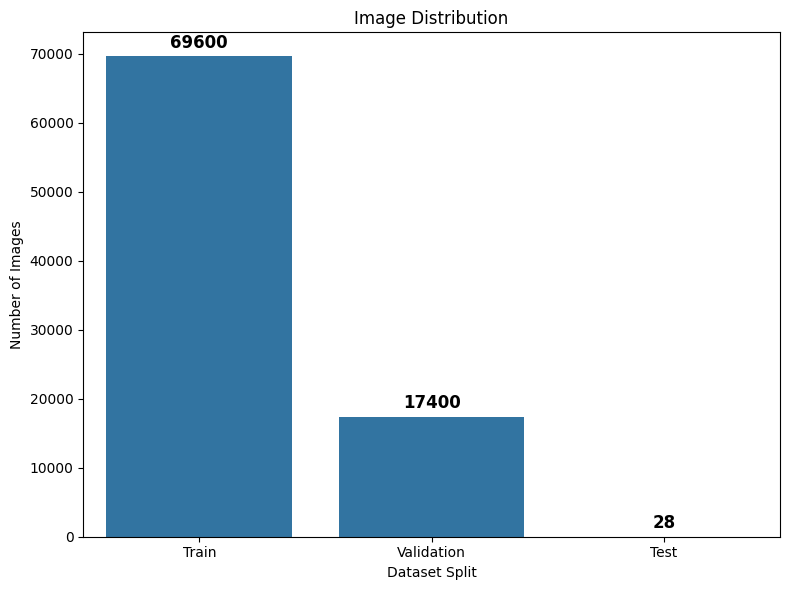

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Counts (replace with actual values if not using variables)
categories = ['Train', 'Validation', 'Test']
image_counts = [train_count, val_count, test_count]

# Create the bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=categories, y=image_counts)

# Add value labels on top of each bar
for i, count in enumerate(image_counts):
    plt.text(i, count + max(image_counts)*0.01, str(count), ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.title('Image Distribution')
plt.xlabel('Dataset Split')
plt.ylabel('Number of Images')
plt.tight_layout()
plt.show()


## Augmentation



In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pandas as pd
import os

# Define paths
base_dir = "/content/asl_dataset"
train_dir = os.path.join(base_dir, "asl_alphabet_train_split")
val_dir = os.path.join(base_dir, "asl_alphabet_val")
test_dir = os.path.join(base_dir, "asl_alphabet_test", "asl_alphabet_test")

# Use only rescaling, no augmentation for all sets
train_datagen = ImageDataGenerator(rescale=1.0/255)
val_test_datagen = ImageDataGenerator(rescale=1.0/255)

# Train generator - pure images only, no augmentation
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical',
    shuffle=True
)

# Validation generator
val_generator = val_test_datagen.flow_from_directory(
    val_dir,
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

# Test generator (using dataframe since test images are in a flat folder)
test_files = [f for f in os.listdir(test_dir) if f.endswith(".jpg")]
test_labels = [f.split("_")[0] for f in test_files]  # Extract label from filename

test_df = pd.DataFrame({
    "filename": test_files,
    "class": test_labels
})

test_generator = val_test_datagen.flow_from_dataframe(
    dataframe=test_df,
    directory=test_dir,
    x_col="filename",
    y_col="class",
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

# (Optional) Counting images code remains the same

def count_images(folder_path):
    count = 0
    for subdir in os.listdir(folder_path):
        subpath = os.path.join(folder_path, subdir)
        if os.path.isdir(subpath):
            count += len(os.listdir(subpath))
    return count

def count_flat_images(path):
    return len([f for f in os.listdir(path) if f.lower().endswith('.jpg')])

train_count = count_images(train_dir)
val_count = count_images(val_dir)
test_count = count_flat_images(test_dir)

print(f"Total images in Train set: {train_count}")
print(f"Total images in Validation set: {val_count}")
print(f"Total images in Test set: {test_count}")


Found 69600 images belonging to 29 classes.
Found 17400 images belonging to 29 classes.
Found 28 validated image filenames belonging to 28 classes.
Total images in Train set: 69600
Total images in Validation set: 17400
Total images in Test set: 28


In [ ]:
labels = [None] * len(train_generator.class_indices)
for label, idx in train_generator.class_indices.items():
    labels[idx] = label

print("Labels order used during training:", labels)

Labels order used during training: ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'del', 'nothing', 'space']


In [ ]:
import os
from collections import defaultdict

# Count images per class from subdirectories (for train & val)
def count_class_images(dataset_dir):
    class_counts = {}
    for class_name in os.listdir(dataset_dir):
        class_path = os.path.join(dataset_dir, class_name)
        if os.path.isdir(class_path):
            class_counts[class_name] = len(os.listdir(class_path))
    return class_counts

# Count images per class from flat test folder (like A_test.jpg)
def count_flat_test_classes(test_dir):
    class_counts = defaultdict(int)
    for file in os.listdir(test_dir):
        if file.lower().endswith(".jpg") and "_" in file:
            class_name = file.split("_")[0]  # 'A_test.jpg' -> 'A'
            class_counts[class_name] += 1
    return dict(class_counts)

# Define paths
train_dir = "/content/asl_dataset/asl_alphabet_train_split"
val_dir = "/content/asl_dataset/asl_alphabet_val"
test_dir = "/content/asl_dataset/asl_alphabet_test/asl_alphabet_test"

# Count images in each split
train_counts = count_class_images(train_dir)
val_counts = count_class_images(val_dir)
test_counts = count_flat_test_classes(test_dir)

# Print results
print("📁 Training Set:")
for class_name, count in sorted(train_counts.items()):
    print(f"{class_name}: {count}")

print("\n📁 Validation Set:")
for class_name, count in sorted(val_counts.items()):
    print(f"{class_name}: {count}")

print("\n📁 Test Set:")
for class_name, count in sorted(test_counts.items()):
    print(f"{class_name}: {count}")


📁 Training Set:
A: 2400
B: 2400
C: 2400
D: 2400
E: 2400
F: 2400
G: 2400
H: 2400
I: 2400
J: 2400
K: 2400
L: 2400
M: 2400
N: 2400
O: 2400
P: 2400
Q: 2400
R: 2400
S: 2400
T: 2400
U: 2400
V: 2400
W: 2400
X: 2400
Y: 2400
Z: 2400
del: 2400
nothing: 2400
space: 2400

📁 Validation Set:
A: 600
B: 600
C: 600
D: 600
E: 600
F: 600
G: 600
H: 600
I: 600
J: 600
K: 600
L: 600
M: 600
N: 600
O: 600
P: 600
Q: 600
R: 600
S: 600
T: 600
U: 600
V: 600
W: 600
X: 600
Y: 600
Z: 600
del: 600
nothing: 600
space: 600

📁 Test Set:
A: 1
B: 1
C: 1
D: 1
E: 1
F: 1
G: 1
H: 1
I: 1
J: 1
K: 1
L: 1
M: 1
N: 1
O: 1
P: 1
Q: 1
R: 1
S: 1
T: 1
U: 1
V: 1
W: 1
X: 1
Y: 1
Z: 1
nothing: 1
space: 1


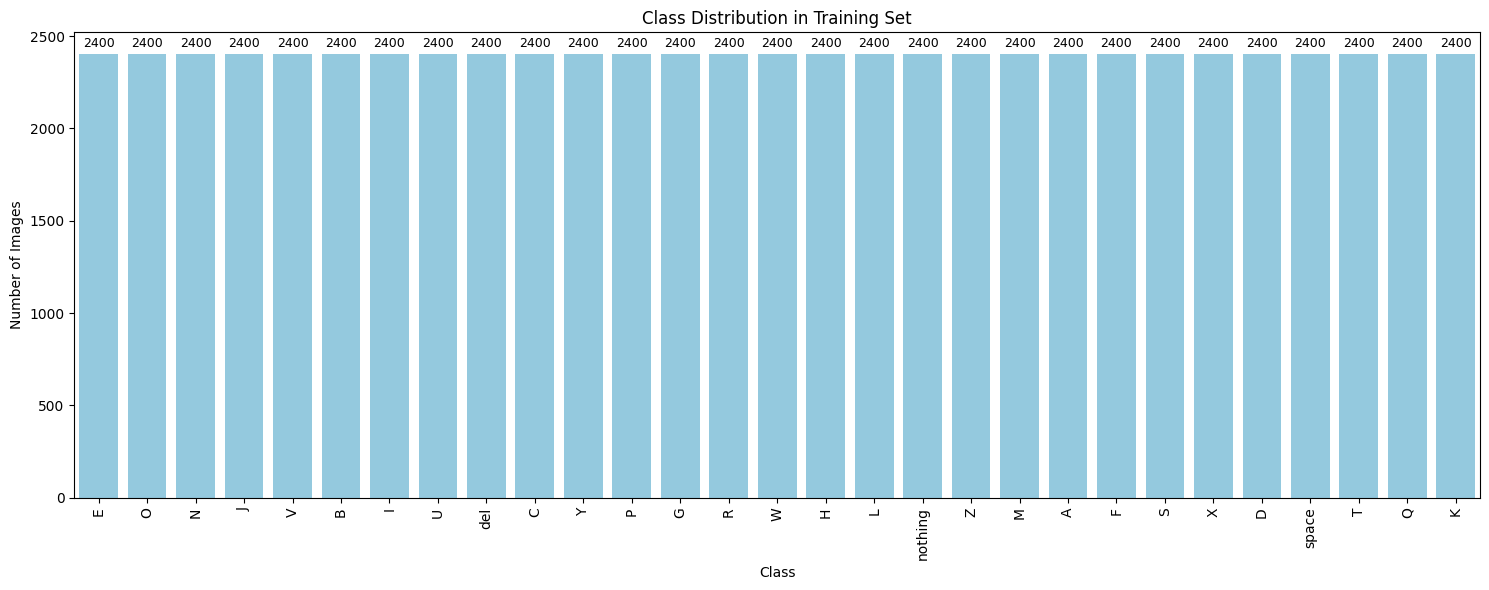

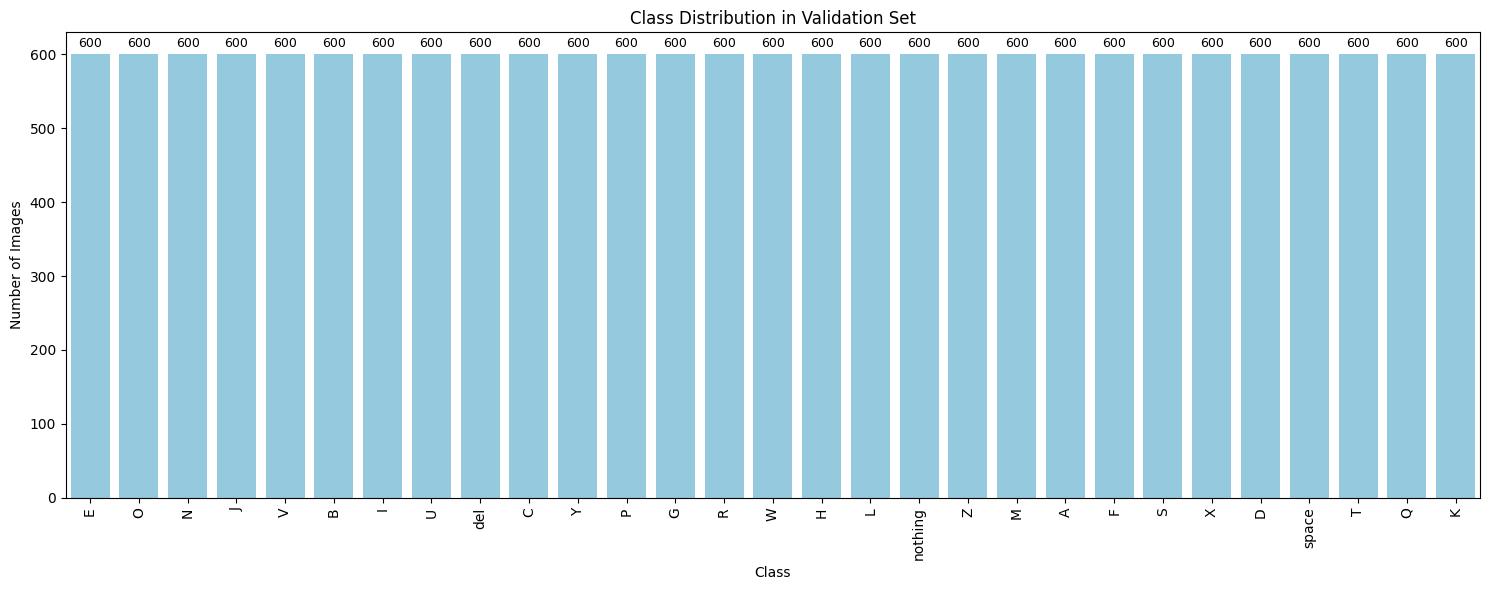

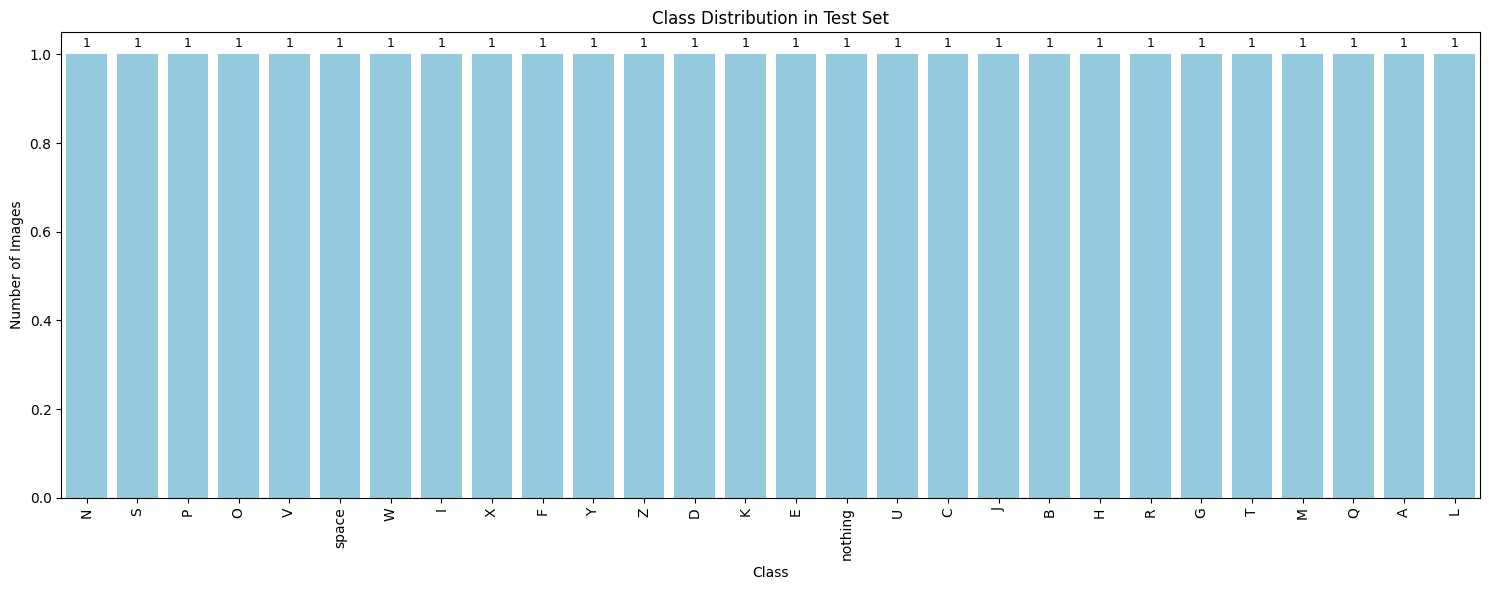

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_class_distribution(dataset_counts, title):
    """Plots the class distribution for a single dataset."""

    class_names = list(dataset_counts.keys())
    class_values = list(dataset_counts.values())

    plt.figure(figsize=(15, 6))  # Adjust figure size as needed
    sns.barplot(x=class_names, y=class_values, color='skyblue')

    # Add value labels on top of bars
    for i, val in enumerate(class_values):
        plt.text(i, val + max(class_values)*0.01, str(val), ha='center', va='bottom', fontsize=9)

    plt.title(title)
    plt.xlabel('Class')
    plt.ylabel('Number of Images')
    plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
    plt.tight_layout()
    plt.show()

# Plot for each dataset split
plot_class_distribution(train_counts, 'Class Distribution in Training Set')
plot_class_distribution(val_counts, 'Class Distribution in Validation Set')
plot_class_distribution(test_counts, 'Class Distribution in Test Set')


# **Model Creating and Testing**

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

# Example fixed hyperparameters (replace with your preferred values)
fixed_hps = {
    'conv1_filters': 32,
    'conv1_kernel': 3,
    'conv2_filters': 64,
    'conv2_kernel': 3,
    'conv3_filters': 128,
    'conv3_kernel': 3,
    'dense_units': 256,
    'dropout_rate': 0.5,
    'learning_rate': 0.001
}


def build_model(hp):
    model = Sequential()

    # First Convolutional Block
    model.add(Conv2D(
        filters=hp.Choice('conv1_filters', values=[32, 64, 128]),
        kernel_size=hp.Choice('conv1_kernel', values=[3, 5]),
        activation='relu',
        input_shape=(64, 64, 3))) # Change input_shape to (64, 64, 3)
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2,2)))

    # Second Convolutional Block
    model.add(Conv2D(
        filters=hp.Choice('conv2_filters', values=[64, 128, 256]),
        kernel_size=hp.Choice('conv2_kernel', values=[3, 5]),
        activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2,2)))

    # Third Convolutional Block
    model.add(Conv2D(
        filters=hp.Choice('conv3_filters', values=[128, 256, 512]),
        kernel_size=hp.Choice('conv3_kernel', values=[3, 5]),
        activation='relu'))
    model.add(BatchNormalization())
    # Global Average Pooling
    model.add(GlobalAveragePooling2D())

    # Fully Connected Layer
    model.add(Dense(
        units=hp.Choice('dense_units', values=[128, 256, 512]),
        activation='relu'))

    # Dropout to prevent overfitting
    model.add(Dropout(hp.Float('dropout_rate', min_value=0.3, max_value=0.6, step=0.1)))

    # Output Layer A-Z + nothing + delete + space
    model.add(Dense(29, activation='softmax'))

    # Compile model
    model.compile(
        optimizer=Adam(learning_rate=hp.Choice('learning_rate', values=[0.001, 0.0005, 0.0001])),
        loss='categorical_crossentropy',
        metrics=['accuracy'])

    return model

# Build the model immediately with fixed hyperparameters
model = build_model(fixed_hps)

# Train the model directly without tuning
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True),
        tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3)
    ]
)

# **Model Evalutation**

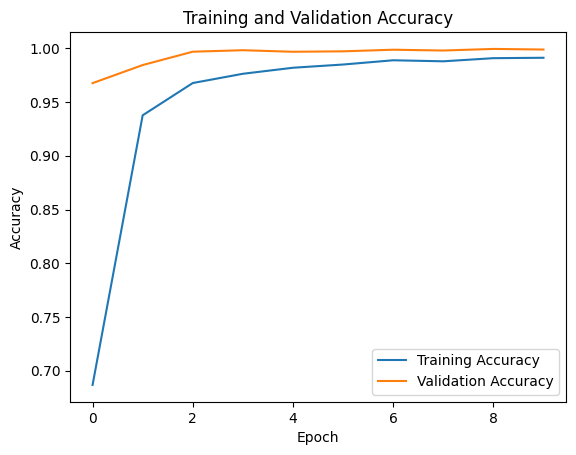

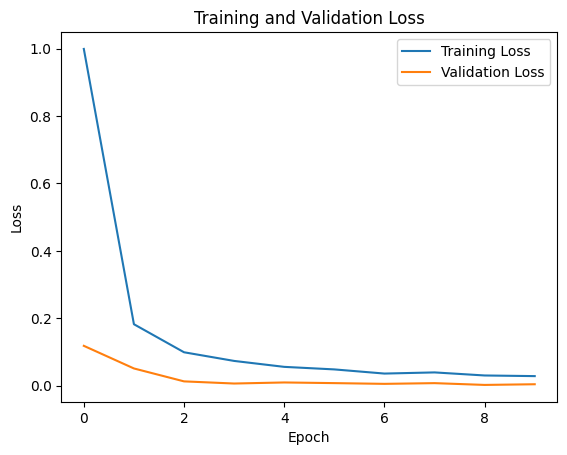

In [ ]:
#Good Training and Validation = Chart goes Up

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
TP: 26
FP: 2
TN: 782
FN: 2
F1 Score (Macro Average on test set classes): 0.8966


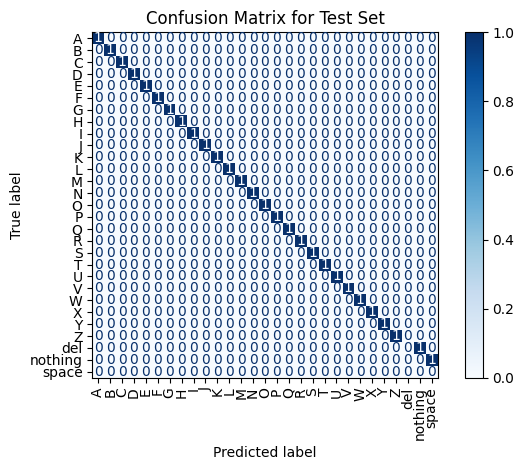

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, f1_score
import matplotlib.pyplot as plt # Ensure plt is imported

# Get predictions for the test set
y_pred_probs = model.predict(test_generator)
y_pred = np.argmax(y_pred_probs, axis=1) # Convert predictions to class labels

# Get true labels for the test set
y_true = test_generator.classes

all_class_indices = list(range(len(labels))) # Assuming labels has 29 items (0 to 28)

cm = confusion_matrix(y_true, y_pred, labels=all_class_indices)

# Calculate TP, FP, TN, FN from the 29x29 matrix
FP = cm.sum(axis=0) - np.diag(cm)
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)

# precision and recall (can detect false positive)
# Calculate f1 score using the true labels and predicted labels for the test set (which are 28 classes)
# We might need to align y_true and y_pred with the 29 classes if calculating class-wise metrics

f1 = f1_score(y_true, y_pred, average='macro')


# Display confusion matrix and metrics
# Use the full list of 29 labels for display
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels) # Use 'labels'
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Test Set')
plt.xticks(rotation=90) # Rotate labels for readability
plt.yticks(rotation=0)
plt.tight_layout()


# Print metrics (these metrics are based on the actual predictions and true values on the test set)
print(f"TP: {TP.sum()}") # Sum of true positives across all 29 classes in the matrix
print(f"FP: {FP.sum()}") # Sum of false positives across all 29 classes in the matrix
print(f"TN: {TN.sum()}") # Sum of true negatives across all 29 classes in the matrix
print(f"FN: {FN.sum()}") # Sum of false negatives across all 29 classes in the matrix
print(f"F1 Score (Macro Average on test set classes): {f1:.4f}") # F1 score calculated on the 28 classes in the test set

plt.show()

# **Save Model**

In [ ]:
model.save('asl_model.h5')

In [ ]:
from tensorflow.keras.models import load_model

model = load_model('/content/asl_model.h5')  # or from Drive path